### Preliminary Data Exploration
Author: catwong@ 12/27/2018

Env: Python 2 (no virtualenv)
Datasets:
- Regex, Learning with Latent Language (Andreas et. al) [https://github.com/jacobandreas/l3/tree/master/data]
- Spatial Navigation (Janner et. al)
[https://github.com/JannerM/spatial-reasoning]
- CLEVR-Humans (Johnson et. al) [https://cs.stanford.edu/people/jcjohns/iep/]

In [3]:
from preliminary.exploration_utils import *
from data.dataset_loading import *
%matplotlib inline 

## Datasets 

#### L3-Regex

l3_regex: dict with keys {train, test, val}; each list of dicts with keys:
- examples: actual I/O pairs.
- hint: the actual NLP examples.
- hints_aug: templated, augmented.
- re: the regex

In [4]:
l3_regex=load_l3(verbose=True)

l3_regex: 
train: 3000 tasks
val: 500 tasks
test: 500 tasks


#### Spatial Reasoning - Janner Version

To load up to max_train train maps and max_val val maps with mode = [ local | global ] instructions and annotations = [ human | synthetic ] descriptions, run:

~~~~
>>> import data
>>> train_data, val_data = data.load(mode, annotations, max_train, max_val)
>>> layouts, objects, rewards, terminal, instructions, values, goals = train_data
~~~~
Local: 1566 train, 399 test
Global

In [8]:
local_sr, global_sr = load_sr(verbose=True)


<Data> Loading local train environments with human annotations
<Data> Found 1566 annotations

<Data> Loading local test environments with human annotations
<Data> Found 399 annotations

<Data> Loading global train environments with human annotations
<Data> Found 1071 annotations

<Data> Loading global test environments with human annotations
<Data> Found 272 annotations
Found 1566 train instructions.
Found 399 test instructions.
Found 1071 train instructions.
Found 272 test instructions.


### CLEVR-Humans

Note: official paper preprocessing is available here. https://github.com/facebookresearch/clevr-iep/blob/master/TRAINING.md

Format: JSON files have keys ['info', 'questions']; questions is a list with format:
```
{u'answer': u'yes', u'question': u'Is there a blue cylinder?', u'split': u'train', u'image_index': 1429, u'image_filename': u'CLEVR_train_001429.png'}
```

In [6]:
clevr_humans = load_clevr_humans(verbose=True)

Found 17817 questions in train
Found 7145 questions in test
Found 7202 questions in val


In [7]:
TOP_LEVEL='/Users/catwong/mit/semantics/'
def load_clevr(verbose=False):
	import json
	questions="clevr_humans/questions/CLEVR_train_questions.json"
	questions=os.path.join(TOP_LEVEL, "data", questions)
	json_data = open(questions).read()
	return json.loads(json_data)
clevr = load_clevr(verbose=True)

### Ground Truth Examples


In [10]:
## SR
## Spatial Reasoning (Janner)
def make_sr_dataset(raw_train, raw_test, verbose):
	sr_dataset = {'train': [], 'test': []}
	for i, dataset in enumerate((raw_train, raw_test)):
		layouts, objects, rewards, terminal, instructions, values, goals = dataset
		mode = 'train' if i == 0 else 'test'
		if verbose:
			print("Found %d %s instructions." % (len(instructions), mode))
		
		for instruction in instructions:
			sr_dataset[mode].append({
				'hints_aug': instruction.split()
			})
	return sr_dataset

def load_sr(verbose=False):
	"""
	Returns: local_sr, global_sr
	"""
	import data.spatialreasoning
	import data.spatialreasoning.environment
	import data.spatialreasoning.data as srdata
	
	annotations='human'
	n_local_train, n_local_val = 50, 50
	n_global_train, n_global_val = 50, 50
	data_path = os.path.join(TOP_LEVEL, "data", "spatialreasoning/data")
	local_train, local_val = srdata.load(data_path, 'local', annotations, n_local_train, n_local_val)
	global_train, global_val = srdata.load(data_path, 'global', annotations, n_global_train, n_global_val)
	return local_train, local_val, global_train, global_val		

local_train, local_val, global_train, global_val = load_sr()


<Data> Loading local train environments with human annotations
<Data> Found 50 annotations

<Data> Loading local test environments with human annotations
<Data> Found 50 annotations

<Data> Loading global train environments with human annotations
<Data> Found 50 annotations

<Data> Loading global test environments with human annotations
<Data> Found 50 annotations


reach cell to left of horse


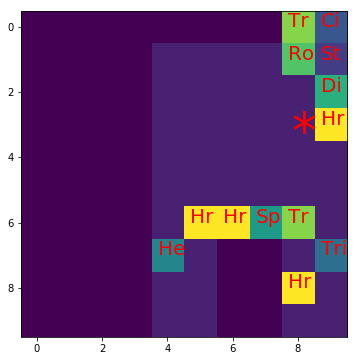

lower right corner , one below the rock


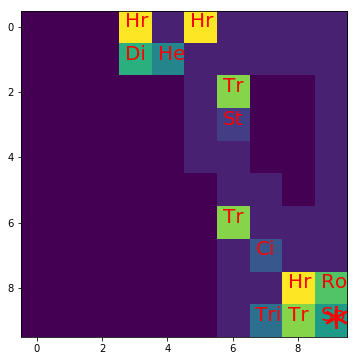

reach goal one square above star .


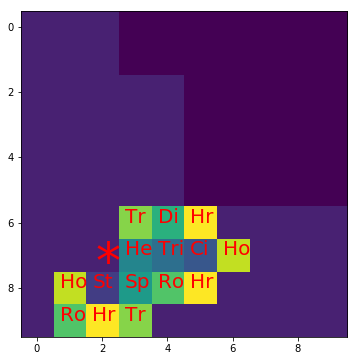

reach the cell between two houses


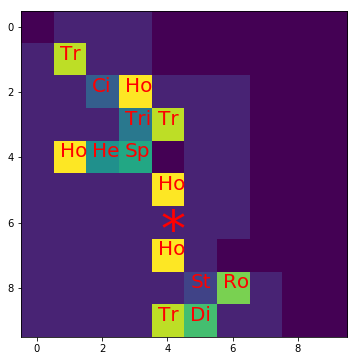

reach cell one left of star .


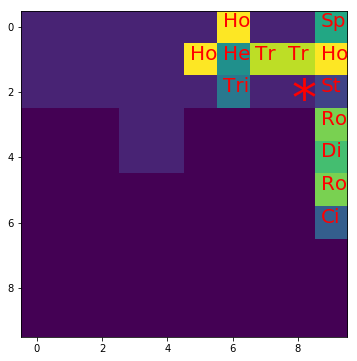

reach cell with diamong


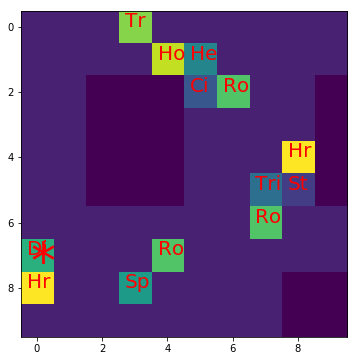

reach the cell one above the triangle and one to the right


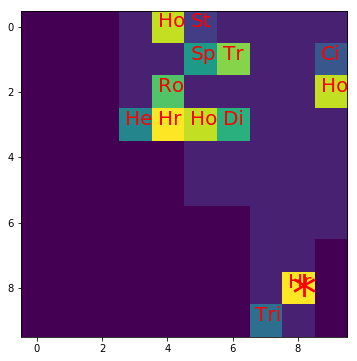

reach goal by going one square right and one square down from the diamond


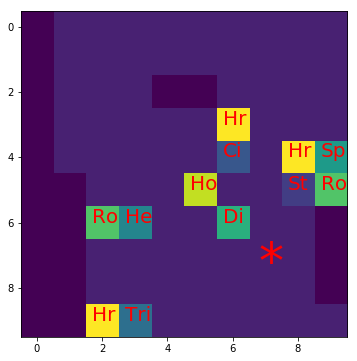

reach cell one under diamond


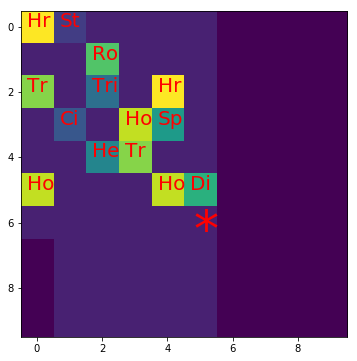

reach cell above triangle


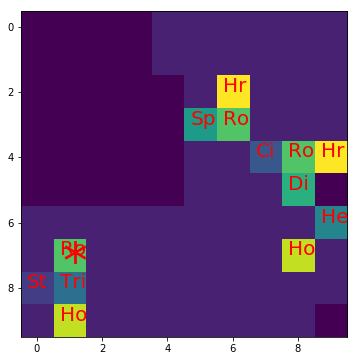

In [13]:
# Get all the layouts
def show_layouts(dataset, inds):
    for j in inds:
        layouts, objects, rewards, terminal, instructions, values, goals = dataset
        print instructions[j]
        from matplotlib import pyplot as plt
        plt.figure(figsize=(6,6))
        plt.imshow(objects[j].squeeze()+layouts[j].squeeze())
        def obj2text(obj, end):
            obj_strs = ['P', "St", "Ci", "Tri", "He", "Sp", "Di", "Ro", "Tr", "Ho", "Hr"]
            for i in range(len(obj)):
                for j in range(len(obj)):
                    if obj[i][j] != 0:
                        plt.text(j-0.3, i, obj_strs[int(obj[i][j])], fontsize=20,color="red")
            plt.text(end[1]-0.2, end[0]+0.7, "*", fontsize=50,color="red")
        obj2text(objects[j].squeeze(), goals[j])
        plt.show()

show_layouts(local_train, range(10))

In [148]:
## Regexes
def show_regexes(dataset, inds):
    for j in inds:
        print(" ".join(dataset[j]['hint']))
        print(dataset[j]['re'])
        print(dataset[j]['examples'])
       
        
show_regexes(l3_regex['train'], [1])


< replace consonants with j p >
<()(C)()@jp>
[[u'<pompadours>', u'<jpojpjpajpoujpjp>'], [u'<punched>', u'<jpujpjpjpejp>'], [u'<recriminations>', u'<jpejpjpijpijpajpiojpjp>'], [u'<agglutination>', u'<ajpjpjpujpijpajpiojp>'], [u'<interfacing>', u'<ijpjpejpjpajpijpjp>'], [u'<salaam>', u'<jpajpaajp>'], [u'<optimum>', u'<ojpjpijpujp>'], [u'<portraiture>', u'<jpojpjpjpaijpujpe>'], [u'<stabilizing>', u'<jpjpajpijpijpijpjp>'], [u'<topazes>', u'<jpojpajpejp>'], [u'<abettors>', u'<ajpejpjpojpjp>'], [u'<pleasantries>', u'<jpjpeajpajpjpjpiejp>'], [u'<exalt>', u'<ejpajpjp>'], [u'<what>', u'<jpjpajp>'], [u'<grant>', u'<jpjpajpjp>'], [u'<parted>', u'<jpajpjpejp>'], [u'<betokened>', u'<jpejpojpejpejp>'], [u'<yell>', u'<jpejpjp>'], [u'<departure>', u'<jpejpajpjpujpe>'], [u'<febrile>', u'<jpejpjpijpe>'], [u'<schoolmates>', u'<jpjpjpoojpjpajpejp>'], [u'<unearned>', u'<ujpeajpjpejp>'], [u'<sacs>', u'<jpajpjp>'], [u'<gnaws>', u'<jpjpajpjp>'], [u'<value>', u'<jpajpue>'], [u'<tried>', u'<jpjpiejp>'], [u'<gum

In [170]:
## CLEVR-Humans
def show_clevr_humans(dataset, inds):
    for j in inds:
        print("Human: " + dataset[j]['question'])
        print("Answer: "+ dataset[j]['answer'])
        # Get the CLEVR programs and original.
show_clevr_humans(clevr_humans['train'],[0])

Human: Is there a blue cylinder?
Answer: yes


In [177]:
## CLEVR
def show_clevr(dataset, inds):
    for j in inds:
        print("Question: " + dataset[j]['question'])
        print("Answer: " + dataset[j]['answer'])
        print("Program:")
        for line in dataset[j]['program']:
            print line 

show_clevr(clevr['questions'], [0])

Question: Are there more big green things than large purple shiny cubes?
Answer: yes
Program:
{u'function': u'scene', u'inputs': [], u'value_inputs': []}
{u'function': u'filter_size', u'inputs': [0], u'value_inputs': [u'large']}
{u'function': u'filter_color', u'inputs': [1], u'value_inputs': [u'green']}
{u'function': u'count', u'inputs': [2], u'value_inputs': []}
{u'function': u'scene', u'inputs': [], u'value_inputs': []}
{u'function': u'filter_size', u'inputs': [4], u'value_inputs': [u'large']}
{u'function': u'filter_color', u'inputs': [5], u'value_inputs': [u'purple']}
{u'function': u'filter_material', u'inputs': [6], u'value_inputs': [u'metal']}
{u'function': u'filter_shape', u'inputs': [7], u'value_inputs': [u'cube']}
{u'function': u'count', u'inputs': [8], u'value_inputs': []}
{u'function': u'greater_than', u'inputs': [3, 9], u'value_inputs': []}


In [164]:
# CLEVR-Humans
def show_clevr_humans(dataset, inds):
    for j in inds:
        print(dataset[j]['question'])
        print("Answer: "+dataset[j]['answer'])
        print(dataset[j]['image_filename'])
        
        

show_clevr_humans(clevr_humans['train'], [0])

Is there a blue cylinder?
Answer: yes
CLEVR_train_001429.png


#### Spatial Reasoning (Janner) and CLEVR-Humans

In [60]:
print("Spatial Reasoning Local and CLEVR-Humans")
local_sr_fdist = ngram_dataset_freq(local_sr['train'], 'hints_aug', verbose=False)
clevr_fdist = ngram_dataset_freq(clevr_humans['train'], 'tokenized', verbose=False)
_ = ngram_cross_dataset_freq([local_sr_fdist, clevr_fdist], verbose=True)

local_sr_fdist = ngram_dataset_freq(local_sr['train'], 'hints_aug', n=2, verbose=False)
clevr_fdist = ngram_dataset_freq(clevr_humans['train'], 'tokenized', n=2, verbose=False)
_ = ngram_cross_dataset_freq([local_sr_fdist, clevr_fdist], verbose=True)

Spatial Reasoning Local and CLEVR-Humans
Cross dataset frequency for 2 datasets.
Original vocabulary sizes are [196, 990]
Combined vocabulary size is 1069; intersected vocab is: 117
Intersection ngrams with freq > 10: 89
50 most common: (not including letters): [((u'the',), 22085), ((u'is',), 9786), ((u'are',), 8745), ((u'of',), 5785), ((u'object',), 3830), ((u'same',), 2565), ((u'to',), 2070), ((u'in',), 1995), ((u'that',), 1555), ((u'and',), 1540), ((u'a',), 1437), ((u'red',), 1270), ((u'blue',), 1229), ((u'purple',), 1216), ((u'green',), 1207), ((u'left',), 1168), ((u'two',), 1065), ((u'right',), 1042), ((u'yellow',), 910), ((u'one',), 780), ((u',',), 639), ((u'brown',), 470), ((u'on',), 456), ((u'other',), 456), ((u'most',), 396), ((u'square',), 395), ((u'above',), 390), ((u'from',), 375), ((u'which',), 344), ((u'between',), 339), ((u'with',), 293), ((u'next',), 276), ((u'by',), 274), ((u'closest',), 269), ((u'circle',), 255), ((u'it',), 251), ((u'diamond',), 230), ((u'gold',), 223

In [63]:
print("Spatial Reasoning Global and CLEVR-Humans")
global_sr_fdist = ngram_dataset_freq(global_sr['train'], 'hints_aug', verbose=False)
clevr_fdist = ngram_dataset_freq(clevr_humans['train'], 'tokenized', verbose=False)
_ = ngram_cross_dataset_freq([global_sr_fdist, clevr_fdist], verbose=True)

global_sr_fdist = ngram_dataset_freq(global_sr['train'], 'hints_aug', n=2, verbose=False)
clevr_fdist = ngram_dataset_freq(clevr_humans['train'], 'tokenized', n=2, verbose=False)
_ = ngram_cross_dataset_freq([global_sr_fdist, clevr_fdist], verbose=True)

Spatial Reasoning Global and CLEVR-Humans
Cross dataset frequency for 2 datasets.
Original vocabulary sizes are [191, 990]
Combined vocabulary size is 1079; intersected vocab is: 102
Intersection ngrams with freq > 10: 81
50 most common: (not including letters): [((u'the',), 21904), ((u'is',), 9719), ((u'of',), 5509), ((u'object',), 3833), ((u'same',), 2565), ((u'to',), 2187), ((u'in',), 1984), ((u'that',), 1478), ((u'a',), 1411), ((u'as',), 1279), ((u'red',), 1259), ((u'and',), 1123), ((u'all',), 1082), ((u'left',), 969), ((u'right',), 881), ((u'two',), 873), ((u'most',), 667), ((u',',), 614), ((u'or',), 597), ((u'items',), 591), ((u'one',), 532), ((u'on',), 460), ((u'other',), 458), ((u'go',), 426), ((u'square',), 408), ((u'which',), 344), ((u'farthest',), 324), ((u'only',), 311), ((u'from',), 293), ((u'between',), 266), ((u'closest',), 266), ((u'next',), 255), ((u'it',), 245), ((u'move',), 228), ((u'both',), 214), ((u'above',), 196), ((u'with',), 189), ((u'furthest',), 184), ((u'blo

## Within Domain Frequency Analyses

In [135]:
# Frequency Distributions

# # L3 Regex
# print("L3 Regex Frequency Distribution")
# train_hint = ngram_dataset_freq(l3_regex['train'], 'hints_aug', verbose=True)
# test_hint = ngram_dataset_freq(l3_regex['test'], 'hints_aug', verbose=True)

# train_hint = ngram_dataset_freq(l3_regex['train'], 'hints_aug', n=2, verbose=True)
# test_hint = ngram_dataset_freq(l3_regex['test'], 'hints_aug', n=2, verbose=True)

# SR
print("SR Frequency Distribution")
print ("LOCAL:")
_= ngram_dataset_freq(local_sr['train'], 'hints_aug', verbose=True)
_= ngram_dataset_freq(local_sr['test'], 'hints_aug', verbose=True)

_= ngram_dataset_freq(local_sr['train'], 'hints_aug', n=2, verbose=True)
_= ngram_dataset_freq(local_sr['test'], 'hints_aug', n=2, verbose=True)

print ("\nGLOBAL:")
_= ngram_dataset_freq(global_sr['train'], 'hints_aug', verbose=True)
_= ngram_dataset_freq(global_sr['test'], 'hints_aug', verbose=True)

_= ngram_dataset_freq(global_sr['train'], 'hints_aug', n=2, verbose=True)
_= ngram_dataset_freq(global_sr['test'], 'hints_aug', n=2, verbose=True)

# # CLEVR
# print("CLEVR_HUMANS Frequency Distribution")
# print("TRAIN")
# _= ngram_dataset_freq(clevr_humans['train'], 'tokenized', verbose=True)
# _= ngram_dataset_freq(clevr_humans['train'], 'tokenized', n=2, verbose=True)


SR Frequency Distribution
LOCAL:
Printing for ngram, n=1
Num descriptions: 1566
Description avg: 8, med: 8, min: 2, max: 24
Vocabulary size: 196
Ngrams with freq > 10: 62
Total ngram in corpus: 12757
50 most common: (not including letters): [((u'the',), 1780), ((u'reach',), 1082), ((u'cell',), 805), ((u'of',), 695), ((u'to',), 684), ((u'one',), 492), ((u'left',), 450), ((u'and',), 440), ((u'above',), 369), ((u'right',), 350), ((u'below',), 325), ((u'heart',), 254), ((u'house',), 248), ((u'tree',), 240), ((u'circle',), 235), ((u'spade',), 231), ((u'two',), 230), ((u'diamond',), 229), ((u'rock',), 217), ((u'horse',), 209), ((u'triangle',), 190), ((u'star',), 189), ((u'space',), 163), ((u'square',), 145), ((u'with',), 135), ((u'is',), 118), ((u'that',), 113), ((u'go',), 104), ((u'from',), 97), ((u'between',), 81), ((u'spaces',), 71), ((u'move',), 70), ((u'blue',), 70), ((u'down',), 66), ((u'up',), 63), ((u'cells',), 39), ((u'directly',), 39), ((u'green',), 34), ((u'purple',), 34), ((u'und